# Matplotlib Histograms

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

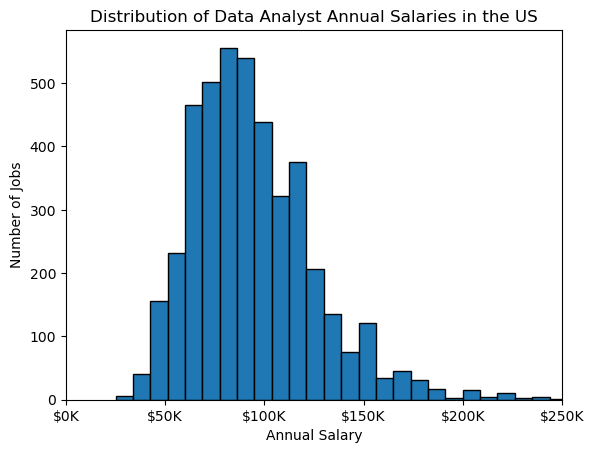

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250_000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Annual Salaries in the US')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

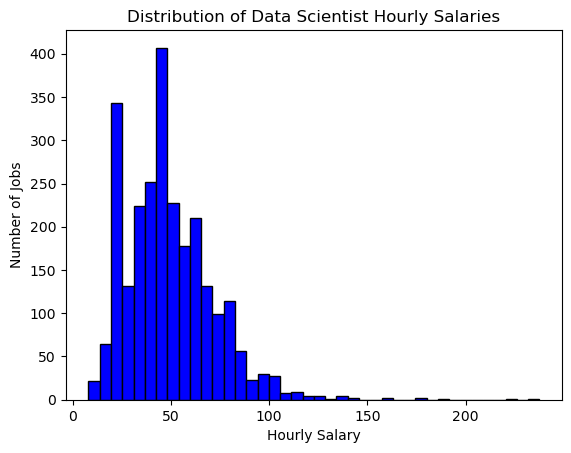

In [12]:
# Only get data scientist jobs in the US
df_DS = df[(df['job_title_short'] =='Data Scientist')].copy()

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')


plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')

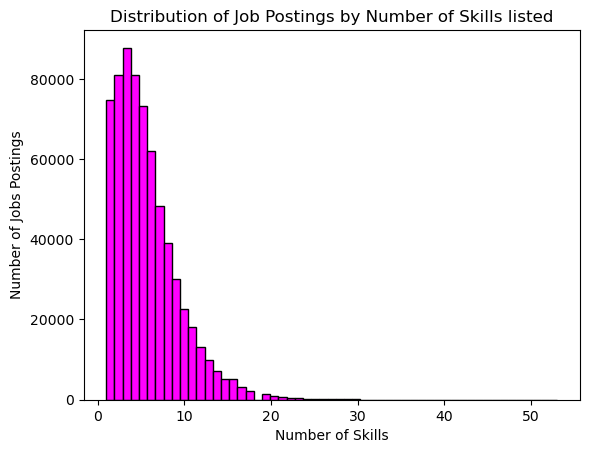

In [17]:
df_skills = df[df['job_skills'].notna()].copy()

df_skills['num_skills'] = df_skills['job_skills'].apply(len)

df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Jobs Postings')

plt.show()

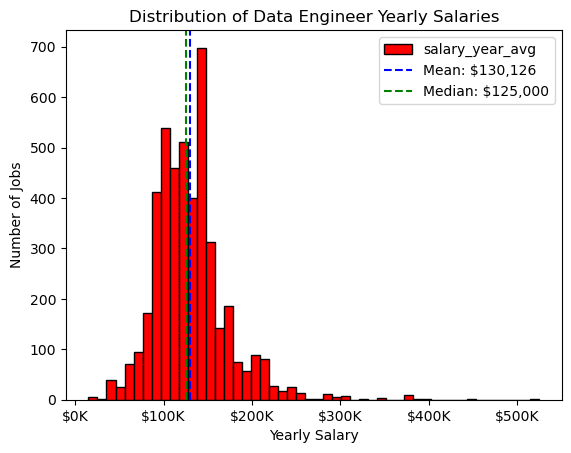

In [21]:
# Only get data engineer jobs
df_DE = df[(df['job_title_short'] =='Data Engineer')].copy()

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')


plt.title('Distribution of Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.legend()

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()